# Difference in the occurrence of urban terms between the Sci-fi and random corpora

#### Statistical significance of differences in occurrences per 100k words of urban terms between the two corpora


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scs
import matplotlib.pyplot as plt

terms = pd.read_csv('/content/drive/My Drive/Università/3 ANNO MAGISTRALE/TESI/2_terms/termsdata.csv.gz')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
terms["lem_word"] = terms["lem_word"].astype(str)
terms["decade"] = (terms["year"]//10)*10

In [0]:
chisquare = scs.chisquare
chi2 = scs.chi2

def chi_square_test(x0, x1):
    # x0, x1 is my data as numpy arrays
    # sampling
    N = range(0, len(x0), 1)
    n = len(x1)
    chi2_dist = []
    p_dist = []
    for _ in range(100):
        idxs = np.random.choice(N, n, replace=True)
        x0_sample = [x0[idx] for idx in idxs]
        chi_2, p = chisquare(f_obs=x1, f_exp=x0_sample)
        chi2_dist.append(chi_2)
        p_dist.append(p)
    # critical value for X^2 distribution
    alpha = 0.05
    probability = 1 - alpha
    df = n - 1
    value = chi2.ppf(probability, df)
        
    return chi2_dist, p_dist, value

In [0]:
import csv

def creating_terms_list(csv_path):

    with open(csv_path, 'r', encoding='utf-8') as csv_file:
        dict_csv = csv.DictReader(csv_file)
        list_terms = [row["term"] for row in dict_csv]

        return list_terms

In [0]:
# Extract urban terms collected by hand
urbanterms = creating_terms_list("/content/drive/My Drive/Università/3 ANNO MAGISTRALE/TESI/2_terms/urbanterms.csv")
print(len(urbanterms))

77


In [0]:
urban = terms.loc[terms["lem_word"].isin(urbanterms)]

In [0]:
urban_scifi = urban[urban["corpus"] == "scifi"].copy()
urban_random = urban[urban["corpus"] == "random"].copy()

## STATS 1 Occurrences of urban terms per 100k words in each book

In [0]:
#STATS 1: Mean number of urban terms per 100k of words in each book
urban.groupby(["corpus", "htid"], as_index=False)["occurs_100k"].sum().groupby("corpus").mean()

,occurs_100k
corpus,
random,347.375329
scifi,307.226902


In [0]:
#STATS 1: Occurrences of urban terms per 100k of words in each book
g1sf = urban_scifi.groupby(["htid"], as_index=False).sum()["occurs_100k"].dropna()
g1ran = urban_random.groupby(["htid"], as_index=False).sum()["occurs_100k"].dropna()

Ttest_indResult(statistic=-2.902297073257811, pvalue=0.003948564008509866)
MannwhitneyuResult(statistic=2147693.5, pvalue=5.413426059379804e-06)
votes for H1:100, and votes for H0:0


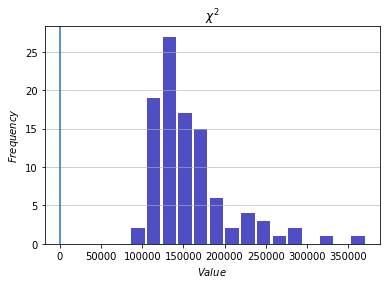

In [0]:
print(scs.ttest_ind(g1sf, g1ran, equal_var=False))

print(scs.mannwhitneyu(g1sf, g1ran))

chi2_dist, p_dist, value = chi_square_test(g1ran, g1sf)

# report
plt.hist(x=chi2_dist, bins="auto", color="#0504aa", alpha=0.7, rwidth=0.85)
plt.axvline(value) # decision boundary
plt.grid(axis="y", alpha=0.75)
plt.xlabel(r"$Value$")
plt.ylabel(r"$Frequency$")
plt.title(r"$\chi^2$")
print("votes for H1:{}, and votes for H0:{}".format(np.sum(chi2_dist > value), len(chi2_dist)-np.sum(chi2_dist > value)))

In [0]:
g1 = urban.groupby(["corpus", "htid"], as_index=False)["occurs_100k"].sum()

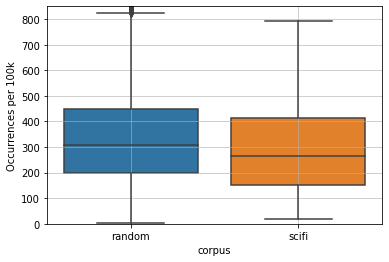

In [0]:
sns.boxplot(x="corpus", y= "occurs_100k", data=g1)
#sns.stripplot(x="corpus", y="occurs_100k", data=g1, size=2, alpha=.25)
plt.ylabel('Occurrences per 100k')
plt.ylim(0,850)
plt.grid(alpha=0.75)
plt.savefig('/content/drive/My Drive/Università/3 ANNO MAGISTRALE/TESI/2_terms/occurs100k_distribution', dpi=500)

#### Occurrences of urban terms per 100k words in each book over time

Text(0, 0.5, 'Occurrences per 100k')

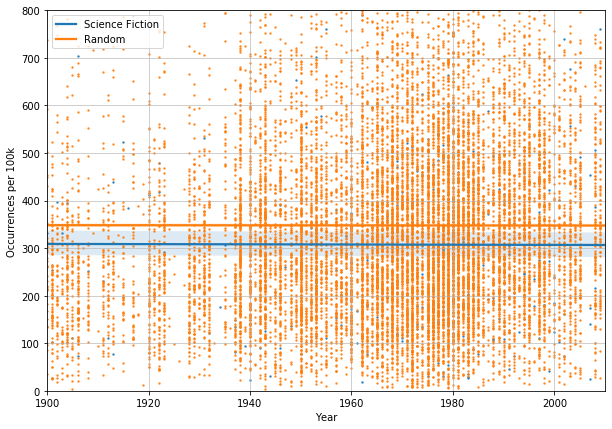

In [0]:
ga = urban_scifi.groupby(["year", "htid"], as_index=False).sum()
gb = urban_random.groupby(["year", "htid"], as_index=False).sum()

# Regression plot using seaborn.
fig = plt.figure(figsize=(10,7))
sns.regplot(x=ga.year,y=ga.occurs_100k,color='tab:blue', scatter_kws={'s':2})
sns.regplot(x=gb.year,y=gb.occurs_100k,color='tab:orange', scatter_kws={'s':2})

# Legend, title and labels.
plt.legend(labels=['Science Fiction','Random'])
plt.grid(alpha=0.75)
plt.xlim(1900,2010)
plt.ylim(0, 800)
plt.xlabel('Year')
plt.ylabel('Occurrences per 100k')
#plt.savefig('/content/drive/My Drive/Università/3 ANNO MAGISTRALE/TESI/2_terms/occurrences_overtime', dpi=500)

Text(0, 0.5, 'Occurrences per 100k')

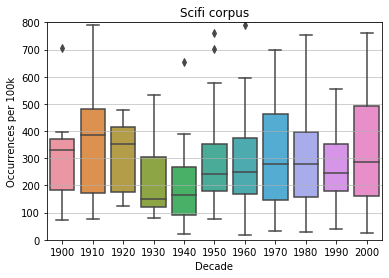

In [0]:
cond = (urban_scifi["decade"] >= 1900) & (urban_scifi["decade"] <= 2011)
g = urban_scifi[cond].groupby(["decade", "htid"], as_index=False).sum()

plt.grid(alpha=0.75)
sns.boxplot(x="decade", y="occurs_100k", data=g)
plt.ylim(0, 800)
plt.title("Scifi corpus")
plt.xlabel('Decade')
plt.ylabel('Occurrences per 100k')
#plt.savefig('/content/drive/My Drive/Università/3 ANNO MAGISTRALE/TESI/2_terms/occurrences_decade_sf', dpi=500)

Text(0, 0.5, 'Occurrences per 100k')

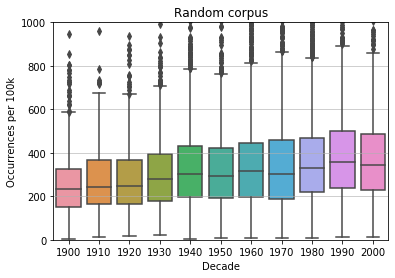

In [0]:
cond2 = (urban_random["decade"] >= 1900) & (urban_random["decade"] <= 2011)
g = urban_random[cond2].groupby(["decade", "htid"], as_index=False).sum()

plt.grid(alpha=0.75)
sns.boxplot(x="decade", y="occurs_100k", data=g)
plt.title("Random corpus")
plt.ylim(0, 1000)
plt.xlabel('Decade')
plt.ylabel('Occurrences per 100k')
#plt.savefig('/content/drive/My Drive/Università/3 ANNO MAGISTRALE/TESI/2_terms/occurrences_decade_ran', dpi=500)

Text(0, 0.5, 'Mean occurrences per 100k')

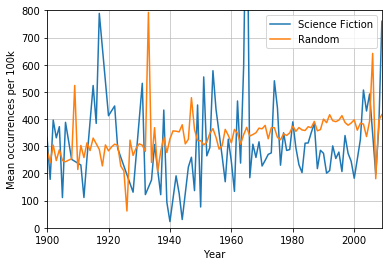

In [0]:
#Occurrences per 100k words of urban terms per book per year
ga = urban_scifi.groupby(["year", "htid"], as_index=False).sum().groupby("year").mean().loc[1900:2011].occurs_100k
gb = urban_random.groupby(["year", "htid"], as_index=False).sum().groupby("year").mean().loc[1900:2011].occurs_100k

#spike up to 1.4k/100k around the beginning of the 60s

ax = ga.plot(color='tab:blue')
gb.plot(ax=ax, color='tab:orange')
plt.legend(labels=['Science Fiction','Random'])
plt.grid(alpha=0.75)
plt.ylim(0,800);
plt.xlabel("Year")
plt.ylabel("Mean occurrences per 100k")
#plt.savefig('/content/drive/My Drive/Università/3 ANNO MAGISTRALE/TESI/2_terms/occurrences_year', dpi=500)

## STATS 3 Occurrences per 100k words of an urban term in a novel

In [0]:
#STATS 3: Mean occurrences per 100k of words of a term in a novel for both corpora
urban.groupby(["corpus", "lem_word", "htid"], as_index=False)["occurs_100k"].sum().groupby("corpus").mean()

,occurs_100k
corpus,
random,29.835131
scifi,25.171141


Ttest_indResult(statistic=-6.293870292211704, pvalue=3.4153626148496816e-10)
MannwhitneyuResult(statistic=322009343.0, pvalue=5.189044264221611e-25)
votes for H1:100, and votes for H0:0


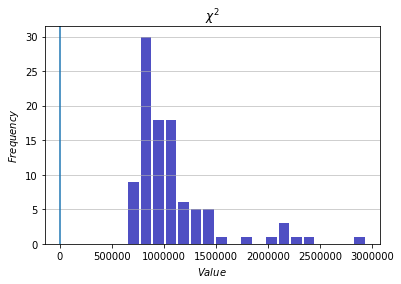

In [0]:
#STATS 2: Occurrences per 100k of words of a term in a novel in the corpora
g3sf = urban_scifi.groupby(["lem_word", "htid"], as_index=False).sum()["occurs_100k"].dropna()
g3ran = urban_random.groupby(["lem_word", "htid"], as_index=False).sum()["occurs_100k"].dropna()

print(scs.ttest_ind(g3sf, g3ran, equal_var=False))
print(scs.mannwhitneyu(g3sf, g3ran))
chi2_dist2, p_dist2, value2 = chi_square_test(g3ran, g3sf)

# report
plt.hist(x=chi2_dist2, bins="auto", color="#0504aa", alpha=0.7, rwidth=0.85)
plt.axvline(value2) # decision boundary
plt.grid(axis="y", alpha=0.75)
plt.xlabel(r"$Value$")
plt.ylabel(r"$Frequency$")
plt.title(r"$\chi^2$")
print("votes for H1:{}, and votes for H0:{}".format(np.sum(chi2_dist2 > value2), len(chi2_dist2)-np.sum(chi2_dist2 > value2)))

## STATS 4 Chi square test on each exact term's occurrences for each novel in the two corpora

### Extraction of occurrences per 100k words per each term in the corpora

In [0]:
def extended_chisquare(dict1, dict2):
    
    votes = dict()
    votes["term"] = []
    votes["H0"] = []
    votes["H1"] = []
    votes["chi2"] = []
    votes["p"] = []
    votes["diff"] = []
    votes["occ_100k_ran"] = []
    votes["occ_100k_sf"] = []
    for term in dict1.keys():
        votes["term"].append(term)
        votes["occ_100k_ran"].append(np.mean(dict1[term]))
        votes["occ_100k_sf"].append(np.mean(dict2[term]))

        if len(dict1[term]) > len(dict2[term]):
            chi2_dist, p_dist, value = chi_square_test(dict1[term], dict2[term])
        else:    
            chi2_dist, p_dist, value = chi_square_test(dict2[term], dict1[term])

        votes["chi2"].append(np.average(chi2_dist))
        votes["p"].append(np.average(p_dist))
        votes["H1"].append(np.sum(chi2_dist > value))
        votes["H0"].append(len(chi2_dist)-np.sum(chi2_dist > value))
        differences = [i - value for i in chi2_dist]
        votes["diff"].append(np.mean(differences))

    return votes

In [0]:
#Creation of dictionary containing terms as keys and lists of occurs_100k values per each book as values
def dict_creation(termsdata, terms_list):
    
    terms_dict = dict()
    for term in terms_list:
        t = termsdata[termsdata["lem_word"] == term].groupby("htid", as_index=False)["occurs_100k"].sum().dropna()
        terms_100k_list = t["occurs_100k"].tolist()
        terms_dict[term] = terms_100k_list
    
    return terms_dict

In [0]:
scifi = terms[terms["corpus"] == "scifi"]

In [0]:
random = terms[terms["corpus"] == "random"].set_index("htid")
n_keep = 1655
keep_idx = np.random.choice(random.index, n_keep, replace=False)
random = random.loc[keep_idx]

In [0]:
#Create list of individual terms for each corpus
terms_scifi = scifi["lem_word"].unique()
terms_random = random["lem_word"].unique()

In [0]:
#Intersection of the two lists = locations in common
terms = np.intersect1d(terms_scifi, terms_random, assume_unique=True)

In [0]:
%%time
terms_100k_scifi = dict_creation(scifi, terms)

In [0]:
%%time
terms_100k_random = dict_creation(random, terms)

In [0]:
%%time
terms_chi2_dict = extended_chisquare(terms_100k_random, terms_100k_scifi)

In [0]:
#terms_chi2 = pd.DataFrame(data=terms_chi2_dict)
#terms_chi2.to_csv("/content/drive/My Drive/Università/3 ANNO MAGISTRALE/TESI/2_terms/terms_chi2A.csv.gz", index=False)

### Comparison between general and urban terms in chi2 values

In [0]:
terms_chi2 = pd.read_csv("/content/drive/My Drive/Università/3 ANNO MAGISTRALE/TESI/2_terms/terms_chi2.csv.gz")

In [0]:
#create dataframe only for urban terms where they are sorted on the basis of the magnitute of difference between chi2 and value
urban_chi2 = terms_chi2.loc[terms_chi2["term"].isin(urbanterms)].sort_values("diff", ascending=False)

In [0]:
comparing = dict()
for row in urban_chi2.itertuples():
    term = row[1]
    H1 = row[3]
    diff = row[6]
    occ_100k_sf = row[8]
    occ_100k_ran = row[7]
    onepercent =  occ_100k_sf / 100
    cond = (terms_chi2["occ_100k_sf"] > (occ_100k_sf - onepercent)) & (terms_chi2["occ_100k_sf"] < (occ_100k_sf + onepercent)) & (terms_chi2["term"] != term)
    similar = terms_chi2[cond]
    max_diff = similar["diff"].max()
    mean_diff = similar["diff"].mean()

    comparing[term] = [occ_100k_sf, occ_100k_ran, H1, diff, max_diff, mean_diff]

In [0]:
comparison = pd.DataFrame.from_dict(comparing, orient='index', columns=["occ_100k_sf", "occ_100k_ran", "H1", "diff", "max_diff", "mean_diff"])

Text(0, 0.5, 'Occurrences per 100k')

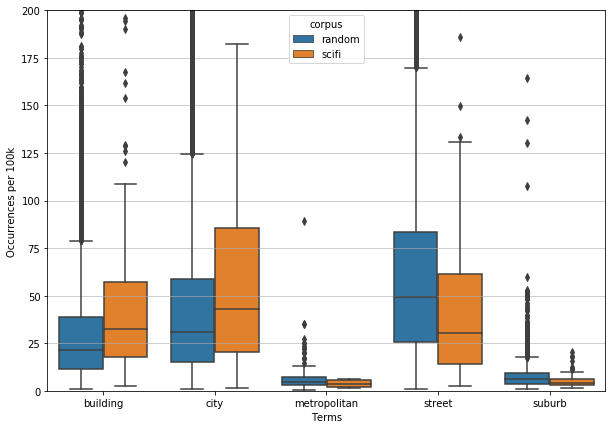

In [0]:
# TERMS THAT ARE HIGHLY STATISTICALLY DIFFERENT
top = comparison[0:5].index
top_terms = terms.loc[terms["lem_word"].isin(top) == True].groupby(["corpus", "lem_word", "htid"], as_index=False).sum()

fig = plt.figure(figsize=(10,7))
plt.grid(alpha=0.75)
g = sns.boxplot(x="lem_word", y="occurs_100k", hue="corpus", data=top_terms)
plt.ylim(0, 200)
plt.xlabel('Terms')
plt.ylabel('Occurrences per 100k')
#plt.savefig('/content/drive/My Drive/Università/3 ANNO MAGISTRALE/TESI/2_terms/top_terms', dpi=500)
#metropolitan: 600
#suburb: 800

Text(0, 0.5, 'Occurrences per 100k')

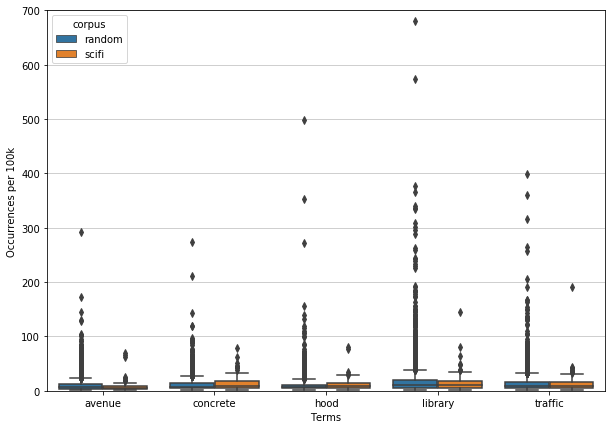

In [0]:
#TERMS THAT ARE AVERAGELY STATISTICALLY DIFFERENT
cond = (comparison["diff"] < comparison["max_diff"]) & (comparison["diff"] > comparison["median_diff"])
middle = comparison[cond][8:13].index
middle_terms = terms.loc[terms["lem_word"].isin(middle) == True].groupby(["corpus", "lem_word", "htid"], as_index=False).sum()

fig = plt.figure(figsize=(10,7))
plt.grid(alpha=0.75)
g = sns.boxplot(x="lem_word", y="occurs_100k", hue="corpus", data=middle_terms)
#(g.set_xticklabels(labels=six_words, rotation=40, ha="right", fontsize=10))
plt.ylim(0, 700)
plt.xlabel('Terms')
plt.ylabel('Occurrences per 100k')
#plt.savefig('/content/drive/My Drive/Università/3 ANNO MAGISTRALE/TESI/2_terms/middle_terms', dpi=500)

Text(0, 0.5, 'Occurrences per 100k')

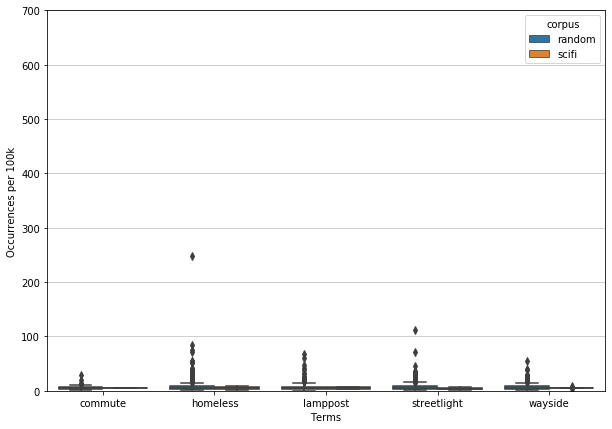

In [0]:
# TERMS THAT ARE BELOW AVERAGE FOR STATISTICAL DIFFERENCE
bottom = comparison[comparison["diff"] < comparison["max_diff"]][-5:].index
bottom_terms = terms.loc[terms["lem_word"].isin(bottom) == True].groupby(["corpus", "lem_word", "htid"], as_index=False).sum()

fig = plt.figure(figsize=(10,7))
plt.grid(alpha=0.75)
g = sns.boxplot(x="lem_word", y="occurs_100k", hue="corpus", data=bottom_terms)
#(g.set_xticklabels(labels=six_words, rotation=40, ha="right", fontsize=10))
plt.ylim(0, 700)
plt.xlabel('Terms')
plt.ylabel('Occurrences per 100k')
#plt.savefig('/content/drive/My Drive/Università/3 ANNO MAGISTRALE/TESI/2_terms/bottom_terms', dpi=500)

# Top books in occurrence of urban terms

## Scifi books with greatest occurrence of urban terms

In [0]:
metadata = pd.read_csv("/content/drive/My Drive/Università/3 ANNO MAGISTRALE/TESI/2_terms/scifi_metadata_htids.csv")
metadata["decade"] = (metadata["date"]//10)*10

In [0]:
titles = metadata[["htid", "title", "decade"]]

### Books with highest number of occurrences per 100k words

In [0]:
top_htids1 = urban_scifi.groupby(["decade", "year", "htid"], as_index=False).sum().sort_values("occurs_100k", ascending=False)

In [0]:
top_books1 = pd.merge(left=titles, right=top_htids1, on="htid").sort_values("occurs_100k", ascending=False)[:20]
top_books1

,htid,title,decade,year,count,occurs_100k
296,uc1.b3607433,Metropolitan,1960,1965,1157,2792.75
179,mdp.39015056811675,Inverted World,1970,1974,839,1850.14
124,mdp.39015016450234,The Squares of the City,1960,1965,733,1243.65
61,mdp.39015056438271,The shadow girl,1960,1962,260,1108.66
185,mdp.39015062115814,Ragtime,1970,1975,388,952.40
111,mdp.39015005906592,Something wicked this way,1960,1962,228,791.05
15,uc2.ark:/13960/t2794143s,A princess of Mars,1910,1917,270,788.86
89,mdp.39015000626039,Not This August,1950,1955,209,760.71
326,pst.000067168613,The Windup Girl,2000,2009,597,759.74
224,uc1.32106005000564,Mockingbird,1980,1980,341,752.98


### Books with highest number of occurrences without common words

In [0]:
common_words = ["city", "building", "road", "street", "crowd"]

In [0]:
top_htids2 = urban_scifi.loc[urban_scifi["lem_word"].isin(common_words) != True].groupby(["decade","htid", "year"], as_index=False).sum().sort_values("occurs_100k", ascending=False)[:20]

In [0]:
top_books2 = pd.merge(left=titles, right= top_htids2, on="htid").sort_values("occurs_100k", ascending=False)[:10]
top_books2

,htid,title,decade,year,count,occurs_100k
18,uc1.b3607433,Metropolitan,1960,1965,1076,2597.23
7,mdp.39015016450234,The Squares of the City,1960,1965,366,620.96
4,mdp.39015005906592,Something wicked this way,1960,1962,127,440.63
13,uc1.32106005000564,Mockingbird,1980,1980,192,423.96
2,mdp.39015046337054,Fahrenheit 451,1950,1953,130,407.05
3,mdp.39015000626039,Not This August,1950,1955,108,393.10
19,mdp.39015041745277,Toward the end of time,1990,1997,192,342.99
9,uc1.$b404260,The Devil is Dead,1970,1977,135,336.43
8,mdp.39015005648749,The Year of the Quiet Sun,1970,1979,116,315.17
11,uc1.32106015466755,Breakfast of Champions,1970,1973,91,306.28


### Books with highest number of occurrences given that they contain at least 20 different urban terms

In [0]:
ten_terms = urban_scifi.groupby(["htid", "lem_word"], as_index=False).sum().groupby("htid").count()

In [0]:
ten_terms_htids = urban_scifi.loc[urban_scifi["htid"].isin(ten_terms[ten_terms["lem_word"] > 20].index.tolist()) == True].groupby(["decade","htid", "year"], as_index=False).sum().sort_values("occurs_100k", ascending=False)[:10]

In [0]:
ten_terms_books = pd.merge(left=titles, right=ten_terms_htids, on="htid").sort_values("occurs_100k", ascending=False)
ten_terms_books

,htid,title,decade,year,count,occurs_100k
5,uc1.b3607433,Metropolitan,1960,1965,1157,2792.75
1,mdp.39015016450234,The Squares of the City,1960,1965,733,1243.65
2,mdp.39015062115814,Ragtime,1970,1975,388,952.40
7,mdp.39015054285773,The Years of Rice and Salt,2000,2002,930,739.71
9,mdp.39015058239735,Omega,2000,2003,569,676.69
4,mdp.39015020711092,Lord Valentine's Castle,1980,1980,548,605.33
0,mdp.39015003899278,The Wanderer,1960,1964,369,594.31
3,inu.30000104227065,Colony,1970,1978,412,585.01
8,mdp.39015059964455,Blind Lake,2000,2003,300,557.14
6,mdp.39015057976790,The Diamond Age,1990,1995,538,556.55


## Random books with greatest occurrence of urban terms

In [0]:
metadata = pd.read_csv("/content/drive/My Drive/Università/3 ANNO MAGISTRALE/TESI/2_terms/random_metadata_htids.csv")
metadata["decade"] = (metadata["year"]//10)*10

In [0]:
titles = metadata[["htid", "title"]]

### Books with highest number of occurrences per 100k words

In [0]:
top_htids = urban_random.groupby(["decade", "year", "htid"], as_index=False).sum().sort_values("occurs_100k", ascending=False)

In [0]:
top_books = pd.merge(left=titles, right= top_htids, on="htid").sort_values("occurs_100k", ascending=False)[:10]
top_books

,htid,title,decade,year,count,occurs_100k
8078,mdp.39015070152114,The other me,1970,1977,63,1311.68
1237,inu.39000005925925,"The ghost of Peg-Leg Peter, and other stories ...",1960,1965,130,1303.90
13166,uc1.b4223349,Trail of blame;,1970,1971,414,1293.86
6817,mdp.39015050963316,Loosestrife city,1980,1980,226,1292.90
8595,mdp.39076002456544,"Winesburg, Ohio",1980,1980,459,1289.92
6234,mdp.39015043058638,Bangkok people,1990,1999,416,1286.90
6000,mdp.39015040365846,The knife thrower and other stories,1990,1998,438,1285.83
13059,uc1.b4098812,"Come, Chucky, come",1950,1952,22,1285.05
4421,mdp.39015024085923,Doc Dudley's daughter,1960,1965,415,1283.23
2338,mdp.39015005615433,Perfecting the earth. -,1900,1902,599,1281.93


### Books with highest number of occurrences per 100k words given they contain at least 20 different urban terms

In [0]:
ten_terms = urban_random.groupby(["htid", "lem_word"], as_index=False).sum().groupby("htid").count()

In [0]:
ten_terms_htids = urban_random.loc[urban_random["htid"].isin(ten_terms[ten_terms["lem_word"] > 20].index.tolist()) == True].groupby(["decade","htid", "year"], as_index=False).sum().sort_values("occurs_100k", ascending=False)[:15]

In [0]:
ten_terms_books = pd.merge(left=titles, right=ten_terms_htids, on="htid").sort_values("occurs_100k", ascending=False)
ten_terms_books

,htid,title,decade,year,count,occurs_100k
13,uc1.$b703870,Law and order,1970,1971,575,2947.35
14,wu.89081501983,Planning stores that pay;,1940,1948,1838,2702.27
2,mdp.39015025221246,Arcadia,1990,1992,1065,2003.09
7,mdp.39015082652663,Ailanthus Park,2000,2008,828,1974.91
0,mdp.39015005201168,"Marcovaldo, or, The seasons in the city",1980,1983,290,1553.04
9,mdp.49015000729716,The park is mine,1980,1981,845,1517.81
1,mdp.39015010532300,"World without end, amen",1970,1973,944,1498.70
11,uc1.b4421429,"World without end, amen",1970,1973,943,1494.93
6,mdp.39015058261028,Stories from the city of God,2000,2003,428,1491.66
5,mdp.39015043326290,Children of chaos,1990,1996,777,1415.08
